In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from os import listdir

#Load image names
#load images
#seperate images based on exposiure time
#calculate median images
#background subtraction
#thresholding

In [9]:
path = 'data/data/830nm/Bastian'
shutter_speeds = []

def split(path):
    s = path.replace('.', '_')
    s = s.split('_')
    return s

print(path)
image_names = listdir(path)
splits = list(map(split, image_names))

shutter_speeds = np.unique(np.array(splits)[:,1]).astype(int)
shutter_speeds = np.sort(shutter_speeds).astype(str)

data/data/830nm/Bastian


In [7]:
all_images = []
for shutter_speed in shutter_speeds:
    names = [name for name in image_names if shutter_speed in name]
    names.sort()
    images = []
    for name in names:
        gray = cv2.cvtColor(cv2.imread(path + "/" + name), cv2.COLOR_BGR2GRAY)
        images.append(gray)
    all_images.append(images)
all_images = np.array(all_images)
all_images = all_images[:,:,:,180:1500]

In [8]:
median_images = []
for images in all_images:
    median = np.median(images, axis=0).astype('uint8')
    median_images.append(median)
median_images = np.array(median_images)

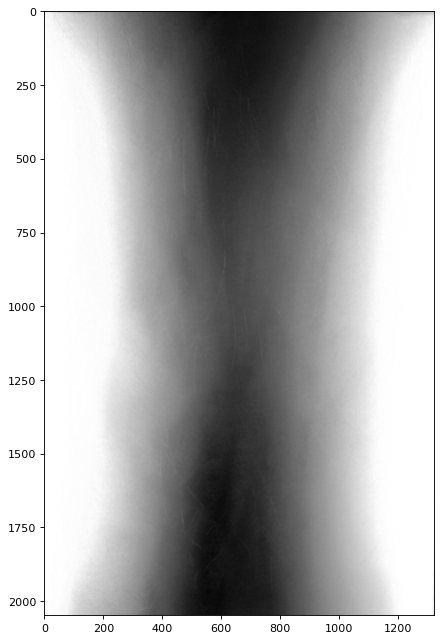

In [25]:
figure(figsize=(10, 10), dpi=80)
plt.imshow(median_images[15], cmap='gray')

In [28]:
image = all_images[16][7].astype('int16')
meidan = median_images[16].astype('int16')
sub = (image-meidan)

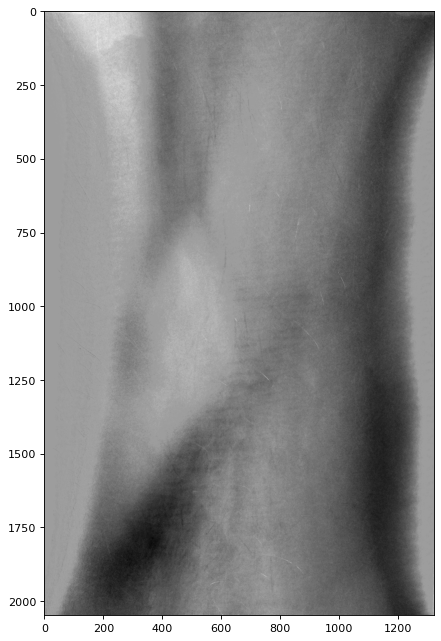

In [29]:
figure(figsize=(10, 10), dpi=80)
plt.imshow(sub, cmap='gray')

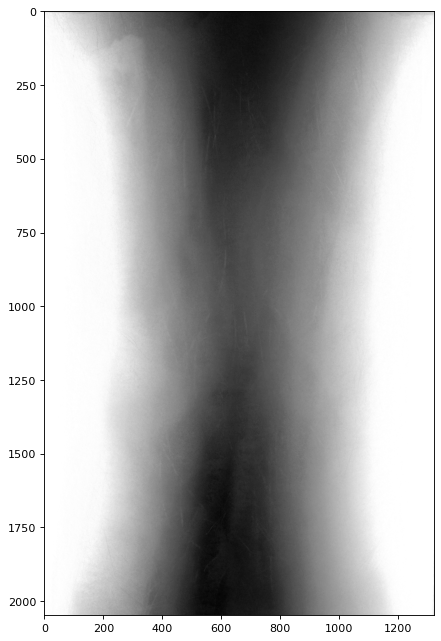

In [30]:
figure(figsize=(10, 10), dpi=80)
plt.imshow(meidan, cmap='gray')

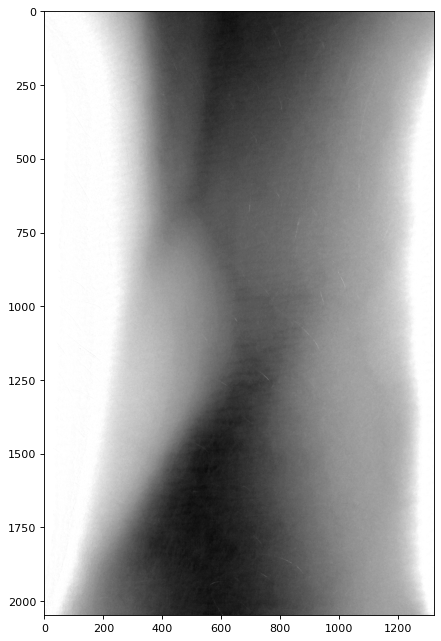

In [31]:
figure(figsize=(10, 10), dpi=80)
plt.imshow(image, cmap='gray')